In [1]:
#import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:


# Read data
df = pd.read_csv("data.csv", sep=";",encoding='ISO-8859-1', doublequote=False, skipinitialspace=True)

# Display the first few rows of the DataFrame
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,...,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,...,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,...,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,...,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,...,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


# Data Exploration

In [3]:
df.shape

(1267, 24)

In [4]:
df.columns

Index(['Group', 'Sex', 'Age', 'Patients number per hour', 'Arrival mode',
       'Injury', 'Chief_complain', 'Mental', 'Pain', 'NRS_pain', 'SBP', 'DBP',
       'HR', 'RR', 'BT', 'Saturation', 'KTAS_RN', 'Diagnosis in ED',
       'Disposition', 'KTAS_expert', 'Error_group', 'Length of stay_min',
       'KTAS duration_min', 'mistriage'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [6]:
#drop all the Nan values
df_cleaned = df.dropna()


In [7]:
df_cleaned.shape

(577, 24)

In [8]:
#Check the data type and counts.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     577 non-null    int64 
 1   Sex                       577 non-null    int64 
 2   Age                       577 non-null    int64 
 3   Patients number per hour  577 non-null    int64 
 4   Arrival mode              577 non-null    int64 
 5   Injury                    577 non-null    int64 
 6   Chief_complain            577 non-null    object
 7   Mental                    577 non-null    int64 
 8   Pain                      577 non-null    int64 
 9   NRS_pain                  577 non-null    object
 10  SBP                       577 non-null    object
 11  DBP                       577 non-null    object
 12  HR                        577 non-null    object
 13  RR                        577 non-null    object
 14  BT                       

In [9]:
#change the name of the columns
df_cleaned=df_cleaned.rename(columns={"Patients number per hour":"patients_per_hour",
                                     "Arrival mode":"arrival_mode",
                                     "NRS_pain":"nurses_assessment_of_pain",
                                     "SBP" : "systolic_blood_pressure",
                                     "DBP" : "diastolic_blood_pressure",
                                     "HR" : "heart_rate",
                                     "RR" : "respiratory_rate",
                                     "BT" : "body_tempature" ,
                                     "Disposition" : "action_to_be_taken",
                                     "Diagnosis in ED" : "Diagnosis_in_ED",
                                     "Length of stay_min" : "Length_of_stay_min",
                                     "KTAS duration_min" : "KTAS_duration_min"})

In [10]:
df_cleaned.columns

Index(['Group', 'Sex', 'Age', 'patients_per_hour', 'arrival_mode', 'Injury',
       'Chief_complain', 'Mental', 'Pain', 'nurses_assessment_of_pain',
       'systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate',
       'respiratory_rate', 'body_tempature', 'Saturation', 'KTAS_RN',
       'Diagnosis_in_ED', 'action_to_be_taken', 'KTAS_expert', 'Error_group',
       'Length_of_stay_min', 'KTAS_duration_min', 'mistriage'],
      dtype='object')

In [11]:
#change some types of columns

new_data_types = {
    'systolic_blood_pressure': 'float64',
    'diastolic_blood_pressure': 'float64',
    'heart_rate': 'float64',
    'respiratory_rate': 'float64',
    'body_tempature': 'float64',
    'Saturation': 'float64'
}

# Replace '??' with NaN
df_cleaned = df_cleaned.replace('??', np.nan)

# Fill NaN values with a default value (e.g., 0 or the mean value of the column) for each column
default_value = 0  # Replace this with the desired default value or a calculation (e.g., mean value of the column)

for column in new_data_types.keys():
    df_cleaned[column].fillna(default_value, inplace=True)

# Change data types of specified columns
df_cleaned = df_cleaned.astype(new_data_types)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Group                      577 non-null    int64  
 1   Sex                        577 non-null    int64  
 2   Age                        577 non-null    int64  
 3   patients_per_hour          577 non-null    int64  
 4   arrival_mode               577 non-null    int64  
 5   Injury                     577 non-null    int64  
 6   Chief_complain             577 non-null    object 
 7   Mental                     577 non-null    int64  
 8   Pain                       577 non-null    int64  
 9   nurses_assessment_of_pain  577 non-null    object 
 10  systolic_blood_pressure    577 non-null    float64
 11  diastolic_blood_pressure   577 non-null    float64
 12  heart_rate                 577 non-null    float64
 13  respiratory_rate           577 non-null    float6

In [12]:
#Reason Visit : Injury [1 = No, 2= Yes]
#Gender : Sex [1 = Famale, 2 = Male]
#Pain : Pain [1 = Yes, 0 = No]
#Menatal : Mental [1 = Alert, 2 = Verbol Response, 3 = Pain Response, 4 = Unresponse]
#Type of ED : Group [1 = Local ED 3th Degree, 2 = Regional ED 4tg Degree]
#Mode of Arrival : Arrival Mode [1 = Walking, 2 = Public Ambulance, 3 = Private Vehicle, 4 = Private Ambulance, 5,6,7 = Other]
#Disposition : Disposition [1 = Dischange, 2 = Admission to ward, 3 = Admission to ICU, 4 = Disharge, 5 = Transfer, 6 = Death, 7 = Surgery]


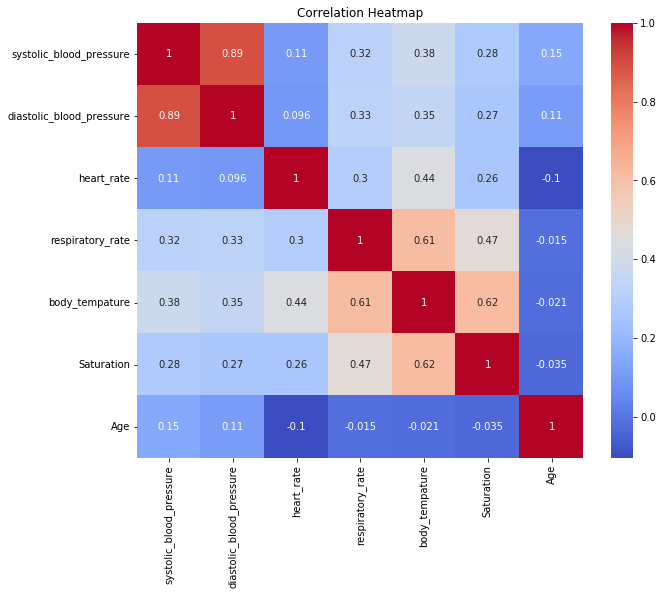

In [13]:
selected_columns = [
    'systolic_blood_pressure',
    'diastolic_blood_pressure',
    'heart_rate',
    'respiratory_rate',
    'body_tempature',
    'Saturation',
    'Age'
]

# Create a correlation matrix for the selected columns
corr_matrix = df_cleaned[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

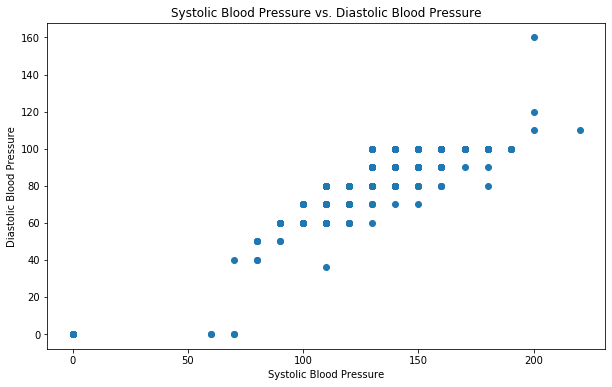

In [14]:
# Scatter plot for systolic and diastolic blood pressure
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['systolic_blood_pressure'], df_cleaned['diastolic_blood_pressure'])

# Set the title, x-axis label, and y-axis label
plt.title("Systolic Blood Pressure vs. Diastolic Blood Pressure")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Diastolic Blood Pressure")

# Show the plot
plt.show()


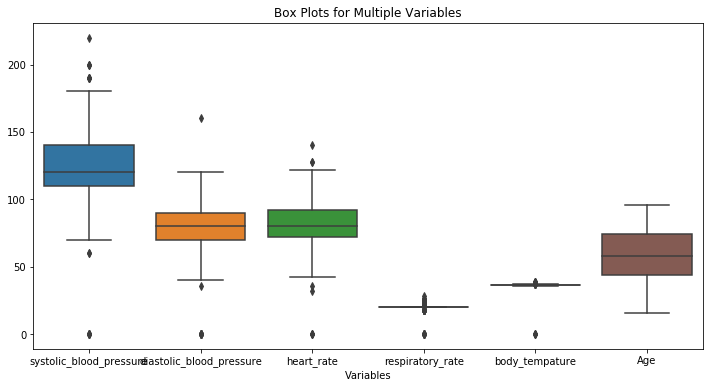

In [15]:

# Variables to create box plots for
columns = ['systolic_blood_pressure', 'diastolic_blood_pressure', 'heart_rate', 'respiratory_rate', 'body_tempature','Age']

# Create a box plot for each variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[columns])

# Set the title and x-axis labels
plt.title("Box Plots for Multiple Variables")
plt.xlabel("Variables")

# Show the plot
plt.show()